In [4]:
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import scipy.optimize as optimize
from findiff import FinDiff, coefficients, Coefficient

In [5]:
# SET THE WORKING DIRECTORY
CWD = '/Users/miguel/Documents/Internship_CENTURI'
os.chdir(CWD)

In [6]:
## DEFINES WORKING CONSTANTS
FILENAME = 'plate_counts.csv'
SAVE_FN = FILENAME.strip().split('.')[0]
#ALPH_DICT = {'A':0, 'B':1, 'C':2, 'D':3, 'E':3, 'F':5, 'G':6, 'H':7}

In [7]:
FILE_PATH = os.path.join(os.getcwd(), "data", FILENAME)
print(FILE_PATH)
df = pd.read_csv(FILE_PATH)

/Users/miguel/Documents/Internship_CENTURI/data/plate_counts.csv


Let's start by reading the data, we have to determine the number of generations from one day to the next. For that we will take the log2 of the rate of final counts to initial counts

In [8]:
df.head()

,founder,replicate,day,cfuml,percent_large,percent_small,percent_total,frac_large,frac_small,num_large,num_small
0,SBW25,3,0,1.766667e+09,100.0,0.0,100,1.0,0.0,1.766667e+09,0.000000e+00
1,SBW25,4,0,1.986667e+09,100.0,0.0,100,1.0,0.0,1.986667e+09,0.000000e+00
2,delserCGA,3,0,6.866667e+08,0.0,100.0,100,0.0,1.0,0.000000e+00,6.866667e+08
3,delserCGA,4,0,1.406667e+09,0.0,100.0,100,0.0,1.0,0.000000e+00,1.406667e+09
4,delEGEG,3,0,8.000000e+08,0.0,100.0,100,0.0,1.0,0.000000e+00,8.000000e+08


In [11]:
delserCGA_df = df[df.founder == 'delserCGA'].copy()
delserCGA_df.sort_values(by=['replicate','day'], inplace=True)

In [26]:
delserCGA_df[delserCGA_df.replicate == 1]

,founder,replicate,day,cfuml,percent_large,percent_small,percent_total,frac_large,frac_small,num_large,num_small
86,delserCGA,1,0,1.246667e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,1.246667e+09
92,delserCGA,1,1,2.593333e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,2.593333e+09
98,delserCGA,1,2,2.766667e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,2.766667e+09
104,delserCGA,1,3,2.024000e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,2.024000e+09
110,delserCGA,1,4,2.928000e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,2.928000e+09
116,delserCGA,1,5,2.328000e+09,0.000000,100.000000,100,0.000000,1.000000,0.000000e+00,2.328000e+09
122,delserCGA,1,6,2.400000e+09,0.666667,99.333333,100,0.006667,0.993333,1.600000e+07,2.384000e+09
128,delserCGA,1,7,2.320000e+09,1.724138,98.275862,100,0.017241,0.982759,4.000000e+07,2.280000e+09
134,delserCGA,1,8,2.000000e+09,5.200000,94.800000,100,0.052000,0.948000,1.040000e+08,1.896000e+09
140,delserCGA,1,9,1.864000e+09,18.884120,81.115880,100,0.188841,0.811159,3.520000e+08,1.512000e+09


Get the number of generations at this time

In [24]:
np.log2(delserCGA_df[delserCGA_df.replicate==1].cfuml.values[1:]/delserCGA_df[delserCGA_df.replicate==1].cfuml.values[:-1])

array([ 1.05673188,  0.09334118, -0.45093955,  0.53270626, -0.3308245 ,
        0.04394335, -0.0489096 , -0.21412481, -0.10159814,  0.07832836,
        0.11818143, -0.25334101,  0.2370392 , -0.0671142 ,  0.4698033 ,
       -0.75359627,  0.35636159,  0.09650798, -1.01707351,  0.83071892,
       -0.13345344,  0.38290488, -0.73371993,  0.98369819, -0.31477338,
        0.52067767, -0.19773037, -0.2055107 ,  0.66716356, -1.64154603,
       -0.10780329,  1.142019  , -1.02272008,  0.66657627, -0.40545145,
        0.3585304 , -0.19094278, -0.65110486,  0.6026645 ,  0.43426207,
       -0.65431055,  0.65950945, -0.67599758,  0.52284079, -0.32192809,
        0.22650853,  0.3439544 , -0.19195131, -0.01674326, -0.05725732,
        0.19118412,  0.02031998, -0.1998694 , -0.45220729])

<Axes: >

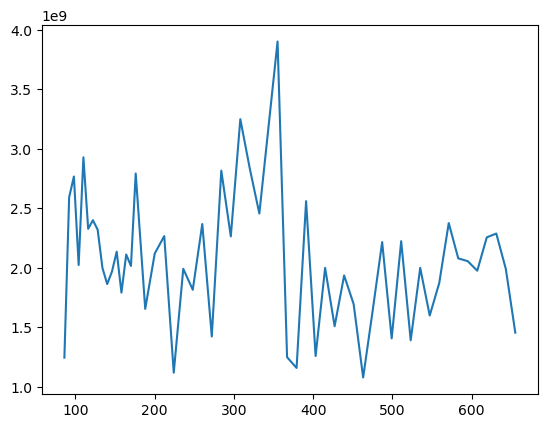

In [27]:
delserCGA_df[delserCGA_df.replicate==1].cfuml.plot()